In [13]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [14]:
# Load the dataset
data = pd.read_csv("players_22.csv")

In [15]:
# Data Preprocessing
# Drop unnecessary columns (e.g., Name, Age, Goalkeeper attributes)
data.drop(columns=['Name', 'Age', 'GK_Diving', 'GK_Handling', 'GK_Kicking', 'GK_Positioning','GK_Reflexes','GK_Speed','Dribbling_Reflexes','Defending_Pace','Physical_Positioning','Pace_Diving','Passing_Kicking','Shooting_Handling'], inplace=True)
#data.info()

In [16]:
# Remove Goalkeeper positions from the target variable
data = data[data['Best_Position'] != 'GK']
#data

In [17]:
# Separate target variable and feature set
X = data.drop('Best_Position', axis=1)
y = data['Best_Position']

In [18]:
# One-Hot Encoding and Label Encoding
# Encode categorical features with OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = pd.DataFrame(onehot_encoder.fit_transform(X.select_dtypes(include=['object'])))
X_encoded.columns = onehot_encoder.get_feature_names_out(X.select_dtypes(include=['object']).columns)
X = X.drop(columns=X.select_dtypes(include=['object']).columns).reset_index(drop=True)
X = pd.concat([X, X_encoded], axis=1)

# Encode the target variable with LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Scaling the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Apply K-Nearest Neighbors
# Instantiate the KNN model (with k=20 as an example)
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [22]:
# Make predictions 
y_pred = knn.predict(X_test)

In [23]:
# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy: {accuracy:.4f}")

# Get the original class labels for each encoded value
original_classes = label_encoder.inverse_transform(range(len(label_encoder.classes_)))
class_mapping = dict(zip(range(len(original_classes)), original_classes))

report = classification_report(y_test, y_pred, target_names=original_classes)
print("\nClassification Report with Original Class Names:")
print(report)

KNN Model Accuracy: 0.6201

Classification Report with Original Class Names:
              precision    recall  f1-score   support

         CAM       0.40      0.44      0.42       238
          CB       0.87      0.88      0.87       652
         CDM       0.52      0.54      0.53       309
          CF       0.50      0.04      0.07        27
          CM       0.48      0.72      0.58       440
          LB       0.71      0.83      0.76       279
          LM       0.32      0.21      0.25       227
          LW       0.18      0.04      0.07        91
         LWB       0.00      0.00      0.00        34
          RB       0.71      0.63      0.67       275
          RM       0.24      0.18      0.21       195
          RW       0.05      0.01      0.02       110
         RWB       0.00      0.00      0.00        43
          ST       0.76      0.93      0.84       502

    accuracy                           0.62      3422
   macro avg       0.41      0.39      0.38      3422
wei

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


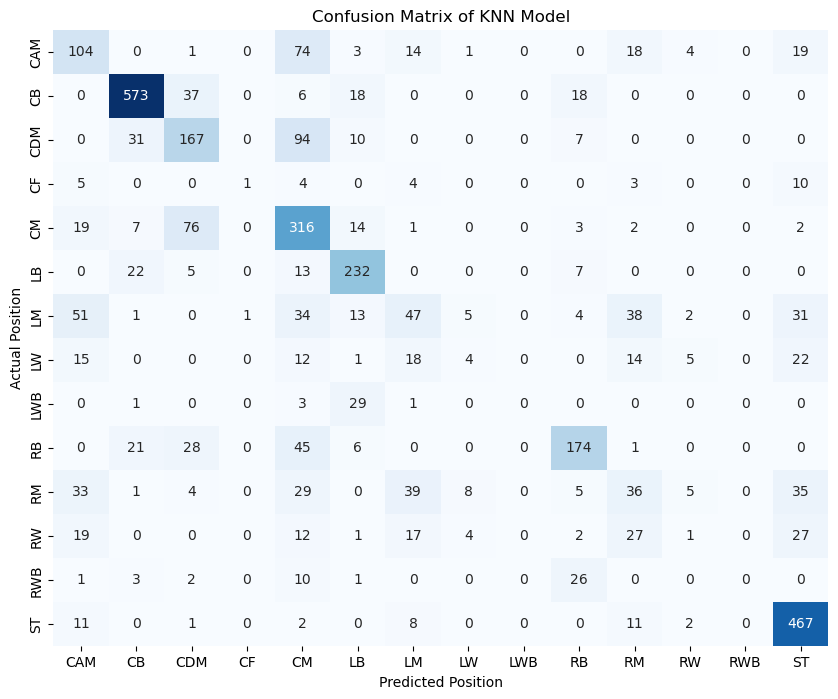

In [24]:
# Plot the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
cm_df = pd.DataFrame(cm, index=label_encoder.classes_, columns=label_encoder.classes_)
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix of KNN Model")
plt.xlabel("Predicted Position")
plt.ylabel("Actual Position")
plt.show()